In [1]:
import numpy as np
import pandas as pd

In [6]:
file  = pd.read_csv(r"C:\Classified Data_new.csv", index_col=0)

In [7]:
file.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [8]:
file.isna().sum()

WTT             0
PTI             0
EQW             0
SBI             0
LQE             0
QWG             0
FDJ             0
PJF             0
HQE             0
NXJ             0
TARGET CLASS    0
dtype: int64

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()
scaler.fit(file.drop('TARGET CLASS', axis=1))

StandardScaler()

In [11]:
scaled_features = scaler.transform(file.drop('TARGET CLASS', axis=1))

In [15]:
scaled_features.shape

(1000, 10)

In [13]:
scaled_features

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784987],
       ...,
       [ 0.64177715, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602454, -0.85567   ],
       [-0.38765353, -0.59589427, -1.43139809, ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [16]:
df_feat = pd.DataFrame(scaled_features, columns = file.columns[:-1])

In [17]:
df_feat

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510
...,...,...,...,...,...,...,...,...,...,...
995,0.211653,-0.312490,0.065163,-0.259834,0.017567,-1.395721,-0.849486,-2.604264,-0.139347,-0.069602
996,-1.292453,-0.616901,0.369613,0.482648,1.569891,1.273495,0.362784,-1.242110,-0.679746,1.473448
997,0.641777,-0.513083,-0.179205,1.022255,-0.539703,-0.229680,-2.261339,-2.362494,-0.814261,0.111597
998,0.467072,-0.982786,-1.465194,-0.071465,2.368666,0.001269,-0.422041,-0.036777,0.406025,-0.855670


In [18]:
from sklearn.model_selection import train_test_split

In [21]:
X = df_feat
y = file['TARGET CLASS']
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.30, random_state=10)

In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
knn = KNeighborsClassifier(n_neighbors = 1)

In [24]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [25]:
pred = knn.predict(X_test)

In [27]:
from sklearn.metrics import classification_report, confusion_matrix

In [34]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.97      0.92      0.94       169
           1       0.90      0.96      0.93       131

    accuracy                           0.94       300
   macro avg       0.93      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



In [ ]:
#Choosing k-value(Elbow method)

In [29]:
error_Rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_Rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

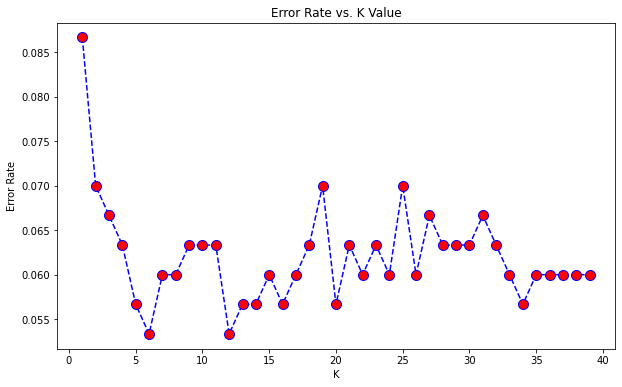

In [32]:
import matplotlib.pylab as plt

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_Rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
#let compare the result at k=23


In [33]:
# NOW WITH K=23
knn = KNeighborsClassifier(n_neighbors=23)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print('/n')
print(classification_report(y_test, pred))

[[155  14]
 [  5 126]]
/n
              precision    recall  f1-score   support

           0       0.97      0.92      0.94       169
           1       0.90      0.96      0.93       131

    accuracy                           0.94       300
   macro avg       0.93      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



In [35]:
# NOW WITH K=1
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print('/n')
print(classification_report(y_test, pred))

[[152  17]
 [  9 122]]
/n
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       169
           1       0.88      0.93      0.90       131

    accuracy                           0.91       300
   macro avg       0.91      0.92      0.91       300
weighted avg       0.92      0.91      0.91       300

